# Week 3 Investigation

Using a suitable image of your own or from our examples (within the zip file) or obtained yourself, and whichever platform you are comfortable with, experiment any of the following sorts of operation: 

- [x] Change brightness and contrast of the image. 
- [x] Change the colour balance of the image.
- [x] Blur the image.  
- [x] Find the edges within the image. 
- [x] Obtain the histogram of the image. 

If you are working with code, you could also go a little further and try some of the segmentation techniques in full (following the examples in the supplied notebook): 

- [ ] Threshold one of the channels in the image. 
- [ ] Cluster the colours in the image.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io

## Hunga-Tonga Explosion

I decided to start with the Hunga-Tonga explosion images that I used in last week's investigation.

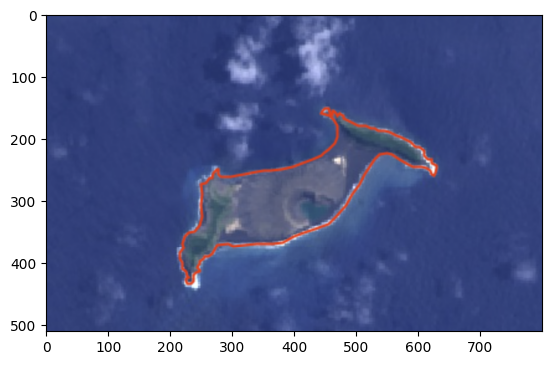

In [2]:
img_ht_before_l8 = io.imread('images/hunga_tonga_before_landsat8.png')

fig0 = plt.figure(0)
ax = fig0.add_subplot(111)
ax.imshow(img_ht_before_l8)

plt.show()

### Changing the brightness and contrast of the image

In this section, I make adjustments to the brightness and the contrast and then display them side-by-side with the original image.

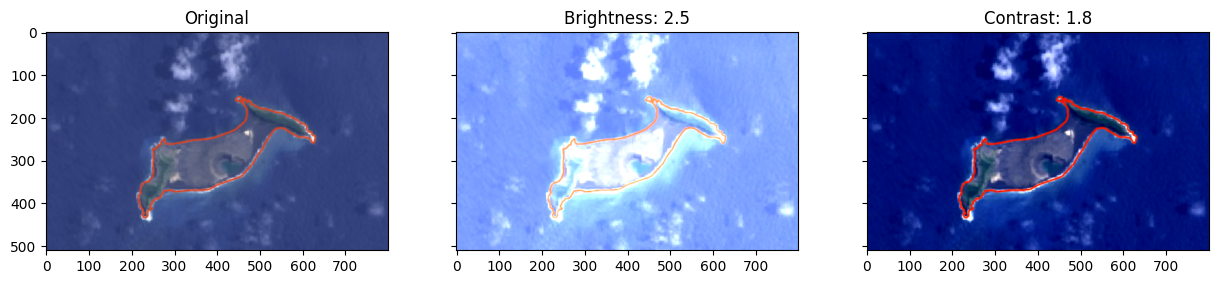

In [3]:
channels = [img_ht_before_l8[:, :, i] for i in range(3)]

brightness = 2.5
contrast_a = 1.8

_fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

ax0.set_title('Original')
ax0.imshow(img_ht_before_l8)

bright_channels = [np.clip((brightness * ch), 0, 255) for ch in channels]
bright_channels = [ch.astype(np.uint8) for ch in bright_channels]

bright_img = np.stack(bright_channels, axis=2)

ax1.set_title(f"Brightness: {brightness}")
ax1.imshow(bright_img)

cont_channels = [np.clip((contrast_a * (ch - 128.0) + 128.0), 0, 255) for ch in channels]
cont_channels = [ch.astype(np.uint8) for ch in cont_channels]

cont_img = np.stack(cont_channels, axis=2)

ax2.set_title(f"Contrast: {contrast_a}")
ax2.imshow(cont_img)

plt.show()

### Change the colour balance of the image

/Users/alan/src/personal/learning/data/space_data/week 3/.venv/lib/python3.12/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


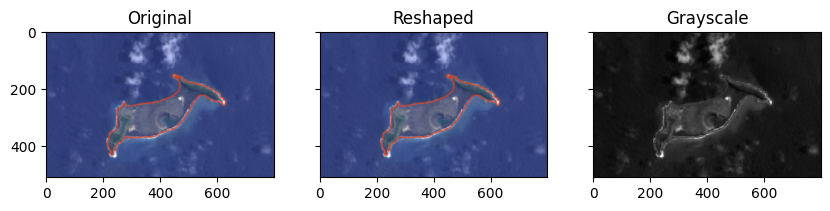

In [4]:
import rasterio
from skimage import color

# NOTE: this will generate a warning as it is not a GeoTIFF file. However, it will still
# work as expected for our needs.
src = rasterio.open('images/hunga_tonga_before_landsat8.png')

_fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

# show original image

ax0.set_title('Original')
ax0.imshow(img_ht_before_l8)

# reshape to image that can be converted to grayscale

channels = [src.read(ch) for ch in [1, 2, 3]]
reshaped = np.stack(channels, axis=-1)

ax1.set_title('Reshaped')
ax1.imshow(reshaped)

# Convert to grayscale

grayscale = color.rgb2gray(reshaped)*255
gray_img = grayscale.astype(np.uint8)

ax2.set_title('Grayscale')
ax2.imshow(gray_img, cmap='gray')

plt.show()


### Blur the image

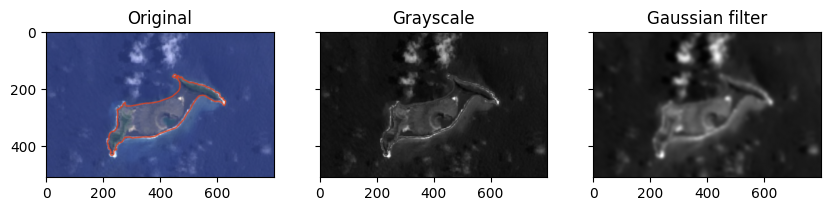

In [5]:
from skimage import filters

_fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

# show original image

ax0.set_title('Original')
ax0.imshow(img_ht_before_l8)

# Convert to grayscale

channels = [src.read(ch) for ch in [1, 2, 3]]
reshaped = np.stack(channels, axis=-1)

grayscale = color.rgb2gray(reshaped)*255
gray_img = grayscale.astype(np.uint8)

ax1.set_title('Grayscale')
ax1.imshow(gray_img, cmap='gray')

# Apply Gaussian filter
blurred = filters.gaussian(gray_img, sigma=5)

ax2.set_title('Gaussian filter')
ax2.imshow(blurred, cmap='gray')

plt.show()


### Find the edges

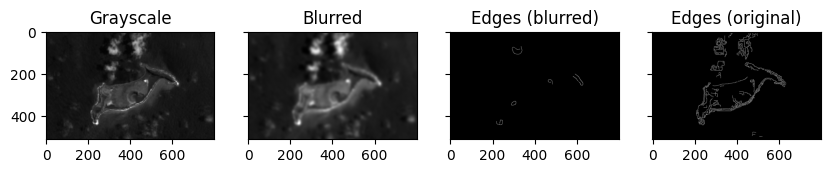

In [6]:
from skimage import feature

_fig, [ax0, ax1, ax2, ax3] = plt.subplots(1, 4, figsize=(10, 5), sharey=True)

# Show the grayscale image

ax0.set_title('Grayscale')
ax0.imshow(gray_img, cmap='gray')

# Show the blurred image

ax1.set_title('Blurred')
ax1.imshow(blurred, cmap='gray')

# Show the edges of the blurred photo

edges_blurred = feature.canny(blurred)

ax2.set_title('Edges (blurred)')
ax2.imshow(edges_blurred, cmap='gray')

# Show the edges of the original photo

edges = feature.canny(gray_img)

ax3.set_title('Edges (original)')
ax3.imshow(edges, cmap='gray')

plt.show()

We can see that this has resulted in an overly agressive edging for this particular image. The edges of the original, unblurred image give us better edging of the island but also include the clouds.

Perhaps a better approach would be to using thresholding to do a cloud mask first... we'll do that later in the exercise.

### Get the histogram of the image

I decided to get both the RGB and grayscale histograms of the image.

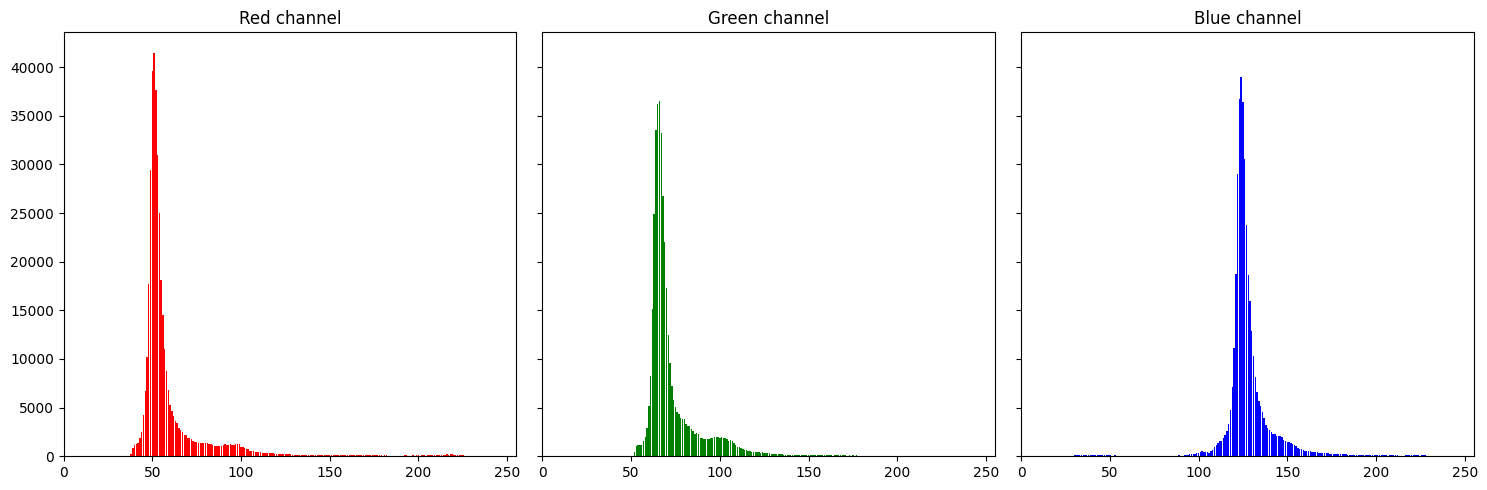

In [8]:
from skimage import exposure

_fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

colors = ['red', 'green', 'blue']

# Plot histograms for each channel
for ax, channel, color in zip(axes, channels, colors):
    hist, bins = exposure.histogram(channel)

    ax.bar(bins, hist, color=color)

    ax.set_xlim(0, 255)

    ax.set_title(f'{color.capitalize()} channel')

plt.tight_layout()
plt.show()

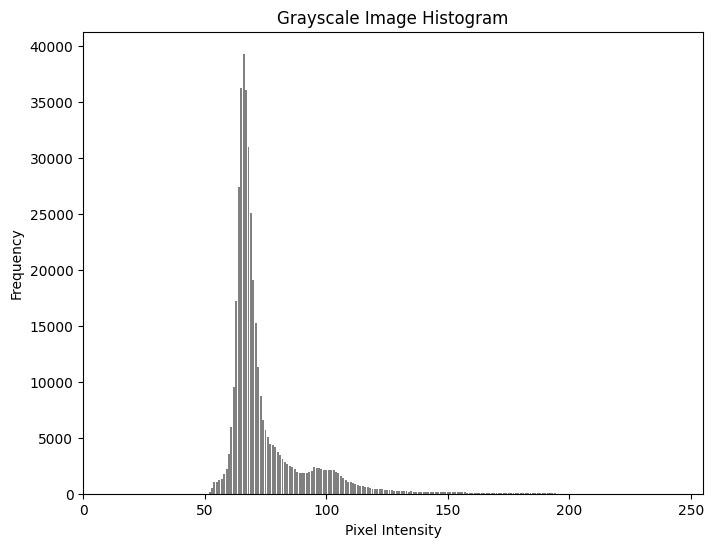

In [9]:
from skimage import color, exposure

# Calculate histogram
hist, bins = exposure.histogram(gray_img, nbins=300)

# Plot the histogram
plt.figure(figsize=(8, 6))

plt.bar(bins, hist, color='gray')

plt.title('Grayscale Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.xlim(0, 255)

plt.show()